In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("projectdata.csv")

In [3]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [4]:
df.drop(['mths_since_last_delinq'], inplace=True, axis=1)
df.drop(['mths_since_last_record'], inplace=True, axis=1)

In [7]:
df.head()

,loan_status,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal
0,Fully Paid,1077501.0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.7,9.0,NaN,NaN
1,Charged Off,1077430.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.4,4.0,NaN,NaN
2,Fully Paid,1077175.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.5,10.0,NaN,NaN
3,Fully Paid,1076863.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,0.0,Feb-96,1.0,10.0,0.0,5598.0,21.0,37.0,NaN,NaN
4,Fully Paid,1075269.0,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,...,0.0,Nov-04,3.0,9.0,0.0,7963.0,28.3,12.0,NaN,NaN


In [6]:
df.id = df.id.astype('str')

In [8]:
all_features = set(df.columns)-set(['loan_status'])
num_features = set(df.describe().columns)
cat_features = all_features-num_features

print("All features:         ", ", ".join(all_features), "\nNumerical features:   ", ", ".join(num_features), "\nCategorical features: ", ", ".join(cat_features))

All features:          earliest_cr_line, installment, issue_d, open_acc, pub_rec, id, revol_bal, dti, emp_length, verification_status, total_acc, loan_amnt, tot_coll_amt, annual_inc, addr_state, term, home_ownership, tot_cur_bal, revol_util, inq_last_6mths, delinq_2yrs, purpose, grade, int_rate 
Numerical features:    total_acc, loan_amnt, tot_coll_amt, installment, annual_inc, open_acc, pub_rec, tot_cur_bal, revol_util, inq_last_6mths, delinq_2yrs, revol_bal, dti, int_rate 
Categorical features:  earliest_cr_line, addr_state, issue_d, term, home_ownership, id, purpose, verification_status, emp_length, grade


/usr/lib64/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7236af5ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f72362ec780>]], dtype=object)

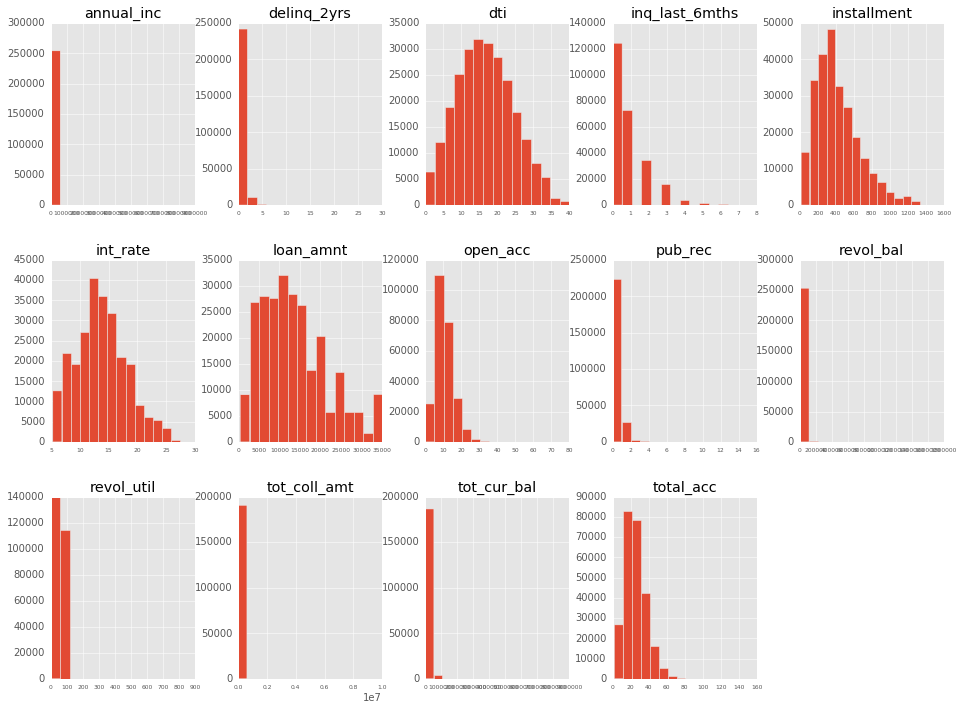

In [48]:
df.hist(figsize=(16,16), layout=(4,5), xlabelsize=6, bins=15)

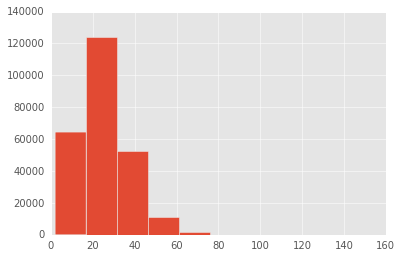

In [28]:
for i in list(num_features)
df.total_acc.hist()

In [13]:
for f in cat_features:
    tab = df[f].value_counts()
    print('%s:\t%s' % (f, ', '.join([ ("%s(%d)" %(tab.index[i], tab.values[i])) for i in range(len(tab))]) ))

earliest_cr_line:	Oct-00(2119), Oct-99(1975), Oct-01(1968), Nov-00(1937), Aug-00(1930), Nov-99(1897), Aug-01(1809), Sep-00(1770), Dec-00(1769), Sep-01(1732), Oct-02(1725), Dec-98(1718), Dec-99(1701), Aug-99(1671), Jan-01(1653), Sep-99(1653), Sep-02(1644), Nov-98(1638), Jul-00(1615), Oct-98(1610), Dec-01(1595), May-01(1586), Nov-01(1586), Jan-00(1580), Jul-01(1576), May-00(1571), Jun-01(1525), Aug-98(1516), Sep-03(1509), Aug-02(1507), Mar-00(1506), Oct-03(1496), Jun-00(1494), Mar-01(1469), Dec-97(1458), Feb-00(1448), Sep-98(1433), Apr-00(1428), Jul-99(1412), Feb-01(1387), Jan-02(1379), Nov-97(1378), Jun-99(1362), Nov-02(1360), Jan-99(1358), Jul-02(1339), Apr-01(1338), May-99(1326), Aug-03(1313), Mar-99(1311), Nov-96(1308), Oct-97(1307), Feb-99(1284), May-02(1280), Jul-03(1269), Oct-04(1263), Nov-03(1263), Mar-02(1256), Sep-04(1248), Oct-96(1224), Apr-02(1224), Feb-02(1218), Dec-02(1214), Jun-02(1202), Dec-96(1193), Apr-99(1181), Jan-98(1178), May-98(1178), Dec-95(1178), Sep-97(1163), Ja

In [14]:
mat = pd.DataFrame(
    [ df[f].value_counts() for f in list(cat_features) ],
    index=list(cat_features)
    ).stack()

pd.DataFrame(mat.values, index=mat.index)

0
earliest_cr_line    Apr-00             1428.0
                    Apr-01             1338.0
                    Apr-02             1224.0
                    Apr-03             1038.0
                    Apr-04              957.0
                    Apr-05              762.0
                    Apr-06              731.0
                    Apr-07              572.0
                    Apr-08              361.0
                    Apr-09              167.0
                    Apr-10               95.0
                    Apr-11               62.0
                    Apr-12                8.0
                    Apr-55                1.0
                    Apr-62                1.0
                    Apr-63                1.0
                    Apr-64                6.0
                    Apr-65                3.0
                    Apr-66                6.0
                    Apr-67               12.0
                    Apr-68               10.0
                    Apr-69               10.0
                    Apr-70               21.0
                    Apr-71               14.0
                    Apr-72               16.0
                    Apr-73               30.0
                    Apr-74               26.0
                    Apr-75               34.0
                    Apr-76               42.0
                    Apr-77               58.0
...                                       ...
purpose             major_purchase     6279.0
                    medical            2869.0
                    moving             2039.0
                    other             14342.0
                    renewable_energy    267.0
                    small_business     4765.0
                    vacation           1596.0
                    wedding            1955.0
verification_status Not Verified      86342.0
                    Source Verified   74472.0
                    Verified          93375.0
emp_length          1 year            16951.0
                    10+ years         77256.0
                    2 years           23647.0
                    3 years           20484.0
                    4 years           16263.0
                    5 years           18136.0
                    6 years           14816.0
                    7 years           14156.0
                    8 years           11922.0
                    9 years            9616.0
                    < 1 year          20974.0
                    n/a                9968.0
grade               A                 42343.0
                    B                 76263.0
                    C                 65680.0
                    D                 40818.0
                    E                 19386.0
                    F                  7739.0
                    G                  1960.0

[255032 rows x 1 columns]